In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from sklearn.model_selection import *
from sqlalchemy import create_engine
import sklearn
import time
import os.path
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import sys
from scipy import stats
import math
import seaborn as sns
import re
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from pprint import pprint
from sklearn.cross_validation import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
from tqdm import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from functools import reduce
from os import listdir
from os.path import isfile, join
import pickle
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.datasets import cifar10
from keras import backend as K
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
plt.ion()
plt.show()

In [31]:
#Input image dimensions
img_rows, img_cols = 32, 32
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
[4]


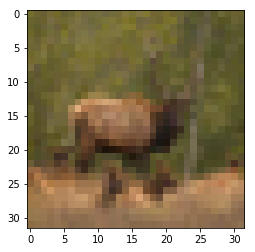

In [32]:
print(x_train.shape)
print(y_train.shape)
random_id = random.randint(0, len(x_train))
plt.imshow(x_train[random_id])
print(y_train[random_id])

In [23]:
np.ravel(np.logical_or(y_train==3,y_train==5)).shape

(50000,)

In [33]:
# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))  
Counter(train_picks)

Counter({False: 40000, True: 10000})

In [34]:
y_train = np.array(y_train[train_picks]==5,dtype=int)
print(y_train.shape)

y_test = np.array(y_test[test_picks]==5,dtype=int)
print(y_test.shape)

(10000, 1)
(2000, 1)


In [38]:
print(Counter(y_train.flatten()))

Counter({0: 5000, 1: 5000})


In [39]:
x_train = x_train[train_picks]
x_test = x_test[test_picks]

In [40]:
K.image_data_format() 

'channels_last'

In [41]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [42]:
x_train.shape

(10000, 32, 32, 3)

In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [48]:
num_classes = 2
print(y_train.shape)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
print(y_train.shape)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

(10000, 1)
(10000, 2)


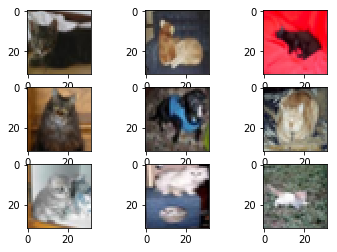

In [59]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

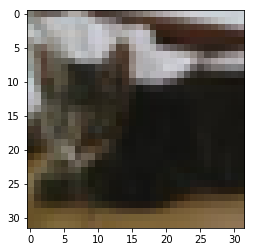

In [61]:
xx = x_train[0:9]
yy = y_train[0:9]
plt.imshow(xx[0])

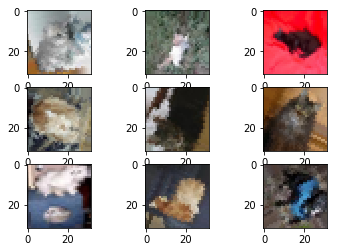

In [65]:
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(xx)
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(xx, yy, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

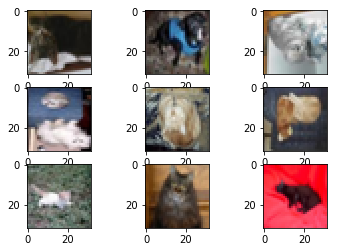

In [68]:
# Rotate images by 90 degrees
datagen = ImageDataGenerator(vertical_flip=90)
# fit parameters from data
datagen.fit(xx)
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(xx, yy, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
#         plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

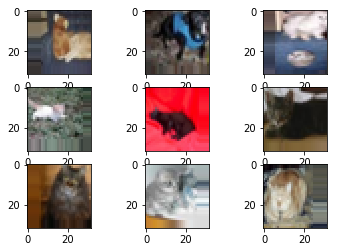

In [67]:
# Shift images vertically or horizontally 
# Fill missing pixels with the color of the nearest pixel
datagen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
                             fill_mode='nearest'
                            )
# fit parameters from data
datagen.fit(x_train)
# fit parameters from data
datagen.fit(xx)
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(xx, yy, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    plt.show()
    break

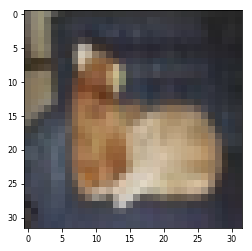

In [72]:
# Lets try augmenting a cifar10 image using these techniques
from skimage import data, img_as_float
from skimage import exposure
import matplotlib


# random_id = random.randint(0, len(x_train))
random_id = 1
plt.imshow(x_train[random_id])
# Set font size for images
matplotlib.rcParams['font.size'] = 8

# Load an example image
img = x_train[random_id]
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


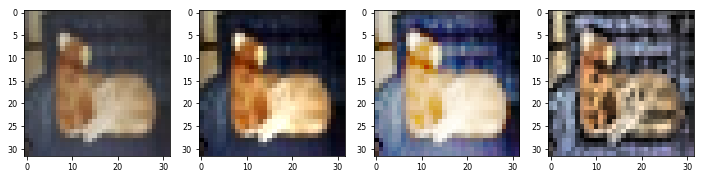

In [86]:
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.figure(figsize=(12, 10))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(img_rescale)
plt.subplot(1,4,3)
plt.imshow(img_eq)
plt.subplot(1,4,4)
plt.imshow(img_adapteq)

In [87]:
def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


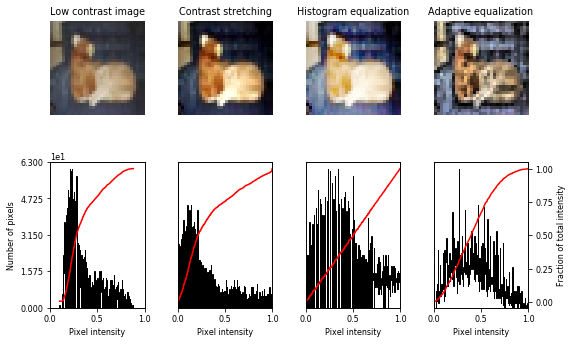

In [93]:
#### Everything below here is just to create the plot/graphs ####

# Display results
fig = plt.figure(figsize=(8, 5)) 
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
    
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
    
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')

ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


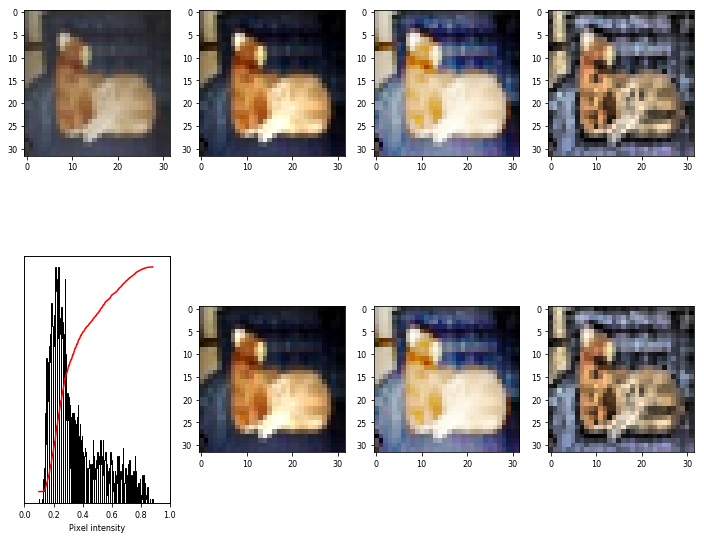

In [105]:
plt.figure(figsize=(12, 10))
plt.subplot(2,4,1)
plt.imshow(img)
plt.subplot(2,4,2)
plt.imshow(img_rescale)
plt.subplot(2,4,3)
plt.imshow(img_eq)
plt.subplot(2,4,4)
plt.imshow(img_adapteq)

bins= 256
ax = plt.subplot(2,4,5)
ax_cdf = ax.twinx()
ax.hist(img.flatten(), bins=bins, histtype='step', color='black')
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
ax.set_xlabel('Pixel intensity')

# Display cumulative distribution
img_cdf, bins = exposure.cumulative_distribution(img, bins)
ax_cdf.plot(bins, img_cdf, 'r')
ax_cdf.set_yticks([])

plt.subplot(2,4,6)
plt.imshow(img_rescale)
plt.subplot(2,4,7)
plt.imshow(img_eq)
plt.subplot(2,4,8)
plt.imshow(img_adapteq)